# 1.6 Intro to NLP and Network Analysis

## Table of Contents
#### 1. Importing Libraries
#### 2. Load 20th Century Article
#### 3. Text Wrangling
#### 4. Create an NER object
#### 5. Split the sentence entities from the NER object
#### 6. Load the cleaned countries list
#### 7. Filtering entities from the article
#### 8. Create Relationships

### 1. Importing Libaries

In [1]:
# Data manipulation and analysis
import pandas as pd  # Powerful data analysis and manipulation library
import numpy as np  # Numerical computing library for arrays and mathematical functions

# Natural Language Processing
import spacy  # Industrial-strength NLP library
from spacy import displacy  # Visualization tool for dependency parsing and entity recognition

# Network analysis
import networkx as nx  # Library for the creation, manipulation, and study of complex networks

# File system operations
import os  # Provides functions to interact with the operating system

# Data visualization
import matplotlib.pyplot as plt  # Visualization library for creating static, animated, and interactive plots

# Scientific computing
import scipy  # Library for scientific and technical computing (e.g., optimization, signal processing)

# Regular expressions
import re  # Library for text processing with regular expressions

In [2]:
# Download English module

!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 6.3 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 6.9 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 7.0 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/12.8 MB 7.4 MB/s eta 0:00:01
     ---------------------- ----------------- 7.3/12.8 MB 7.0 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 7.3 MB/s eta 0:00:01
     ---------------------------------- ----- 11.0/12.8 MB 7.5 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 7.4 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English module

NER = spacy.load("en_core_web_sm")

### 2. Load 20th Century Article

In [4]:
# Load the article

with open('20th_century_article_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [5]:
# Process the text

# article = NER(data)

### 3. Text Wrangling

In [6]:
# Additional imports for text preprocessing
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopword lists
from nltk.tokenize import word_tokenize  # Tokenizer for splitting text into words

In [7]:
# Download necessary nltk resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Word Tokenization

tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2Russian', 'Revolution', 'and', 'communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 

In [9]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'than', "wasn't", 'down', 'him', 'any', "hasn't", 'for', 'won', 'ourselves', 'about', "aren't", 'mustn', 'through', 'ain', "hadn't", 'll', 'they', 'the', 'their', 'couldn', 'on', 'be', 'and', 'doesn', 'we', 'then', 'is', 'me', 'more', "needn't", 'to', 'hers', 'too', 'yourselves', 'now', 'if', 'in', 've', 'being', 'not', 'isn', 'yourself', 'into', "mustn't", 'ours', 'each', 'from', 'a', 'o', "you'd", 'doing', 'during', 'does', "couldn't", 'he', 'having', 'until', 'why', 'because', 'out', 'his', "doesn't", 'did', 'this', 'which', 'between', 'her', 'haven', 'do', 'theirs', 'wasn', 'our', 'didn', 'there', 'over', "mightn't", 's', 'himself', 'had', 'with', 'again', 'don', 'or', 'my', 'are', "you've", 'at', 'who', 'against', "don't", 'y', 'once', 'an', 'shan', "haven't", "didn't", 'after', 're', "wouldn't", 'needn', 'hadn', "she's", 'm', 'myself', 'can', 'own', 'wouldn', 'those', 'before', 'up', 'these', 'while', 'further', 'weren', 'it', 'what', 'such', 'other', 'here', 'that', 'all', 'are

In [10]:
# Convert words to lowercase and remove stopwords

filtered_words = []  # Create an empty list
for word in tokenized_word:
    word_lower = word.lower()  # Convert word to lowercase
    if word_lower not in stop_words:
        filtered_words.append(word_lower)

In [11]:
# Substitute all punctuation marks with a space 

filtered_words_2 = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [12]:
# Word tokenization

tokenized_word_2 = word_tokenize(filtered_words_2)
print(tokenized_word_2)

['key', 'events', 'th', 'century', 'wikipediajump', 'contentmain', 'menumain', 'menumove', 'sidebarhide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'us', 'contribute', 'helplearn', 'editcommunity', 'portalrecent', 'changesupload', 'filesearchsearchappearancedonatecreate', 'accountlog', 'inpersonal', 'toolsdonate', 'create', 'account', 'log', 'pages', 'logged', 'editors', 'learn', 'morecontributionstalkcontentsmove', 'sidebarhide', 'top', 'historic', 'events', 'th', 'centurytoggle', 'historic', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'world', 'war', 'russian', 'revolution', 'communism', 'between', 'wars', 'economic', 'depression', 'the', 'rise', 'dictatorship', 'global', 'war', 'world', 'war', 'ii', 'the', 'war', 'europe', 'blitzkrieg', 'operation', 'barbarossa', 'turning', 'tides', 'operation', 'overlord', 'final', 'days', 'the', 'war', 'pacific', 'background', 'japanese', 'ex

In [13]:
# Defining new stopwords

new_stopwords = ["the", "retrieved", "s", "th", "www", "isbn", "u"]

In [14]:
# removing unwanted words from 'tokenized_word_2'

cleaned_text = []
for word in tokenized_word_2:
    if word.isalpha() and word not in new_stopwords:
        cleaned_text.append(word)

In [15]:
# Join the tokens back into a single string

cleaned_text_2 = " ".join(cleaned_text)

In [16]:
print(cleaned_text_2)

key events century wikipediajump contentmain menumain menumove sidebarhide navigation main pagecontentscurrent eventsrandom articleabout wikipediacontact us contribute helplearn editcommunity portalrecent changesupload filesearchsearchappearancedonatecreate accountlog inpersonal toolsdonate create account log pages logged editors learn morecontributionstalkcontentsmove sidebarhide top historic events centurytoggle historic events century subsection world beginning century war end wars world war russian revolution communism between wars economic depression rise dictatorship global war world war ii war europe blitzkrieg operation barbarossa turning tides operation overlord final days war pacific background japanese expansion allied offensive final days holocaust nuclear age begins post war world end empires decolonization cold war war proxy space race end cold war information communications technology world end century see also references sources external linkstoggle table contentskey ev

In [17]:
# Define the file name
output_file = "output_file.txt"

# Save the text to a .txt file
with open(output_file, "w", encoding="utf-8") as file:
    file.write(cleaned_text_2)

#### Text Data Wrangling Process
##### To ensure a clean and analyzable dataset for Named Entity Recognition (NER), I employed a structured data wrangling procedure for the 20th Century wikipedia article. Below is a detailed explanation of the steps taken
1. **Tokenization:** The first step involved tokenizing the text article into individual words (tokenized_word). This allowed for granular manipulation of the text, preparing it for subsequent cleaning steps.
2. **Stopword Removal and Lowercasing:** Common stopwords were removed from the tokenized text, and all words were converted to lowercase (filtered_words). This step ensured irrelevant words were eliminated, and case uniformity was achieved for consistent analysis.
3. **Special Character Substitution:** All special characters were substituted with spaces (filtered_words_2). This transformation ensured the removal of non-alphanumeric characters, leaving a clean text structure.
4. **Re-Tokenization:** The processed text was re-tokenized (tokenized_word_2) to remove any unnecessary spaces introduced during the special character substitution step.
5. **Additional Stopword Removal:** A review of the text revealed additional stopwords that needed to be removed. These were eliminated to refine the text further, resulting in the cleaned dataset (cleaned_text).
6. **Rejoining Tokenized Text:** To prepare the text for NER processing, the cleaned and tokenized text was joined back into a single string (cleaned_text_2). This step was necessary for compatibility with the NER model.
7. **Saving the Data Wrangled Text:** The final cleaned text was saved as a .txt file (output_file) for future reference and reproducibility of the analysis.

### 4. Create an NER object

In [18]:
# Process the cleaned_text

article = NER(cleaned_text_2)

In [19]:
# Visualize identified entities

displacy.render(article[273:20000], style = "ent", jupyter = True)

### 5. Split the sentence entities from the NER object

In [20]:
df_sentences = [] # empty shell to store results

# Loop through sentences, get entity list for each sentence
for sent in article.sents:
    entity_list = [ent.text for ent in sent.ents]
    df_sentences.append({"sentence": sent, "entities": entity_list})
    
df_sentences = pd.DataFrame(df_sentences)

In [21]:
df_sentences.head()

,sentence,entities
0,"(key, events, century, wikipediajump, contentm...","[century, world war ii, europe, japanese, cent..."
1,"(well, eastern, poland, would, remain, soviet,...","[poland, soviet, finland, soviet, winter, germ..."
2,"(meanwhile, japanese, attacked, united, states...","[japanese, united states, pearl harbor, decemb..."
3,"(allies, invaded, sicily, preparation, advance...","[italy, september, italy, winter southern half..."
4,"(supreme, allied, commander, american, general...","[american, dwight d eisenhower, berlin, german..."


### 6. Load the cleaned countries list

In [22]:
# Import countries

country_df = pd.read_csv("cleaned_countries_list.csv")

In [23]:
country_df.head()

,country_name
0,afghanistan
1,albania
2,algeria
3,andorra
4,angola


### 7. Filtering entities from the article

In [24]:
# Function to filter out entities not of interest

def filter_entity(ent_list, country_df):
    return [ent for ent in ent_list 
            if ent in list(country_df['country_name'])]

In [25]:
# Check

filter_entity(["united states", "CF", "2"], country_df)

['united states']

In [26]:
# Creating new column that only contains the entities column that match with the countries

df_sentences['country_entities'] = df_sentences['entities'].apply(lambda x: filter_entity(x, country_df))

In [27]:
df_sentences['country_entities'].head(20)

0     [france, russia, germany, austria, hungary, bu...
1     [poland, finland, germany, poland, netherlands...
2     [united states, japan, germany, japan, italy, ...
3     [italy, italy, italy, france, germany, germany...
4                                             [germany]
5                                 [japan, china, japan]
6     [japan, japan, china, japan, japan, japan, ger...
7     [united states, united states, japan, united s...
8     [russia, japan, canada, lithuania, russia, chi...
9                                                    []
10                                                   []
11                                                   []
12                                            [austria]
13                                                   []
14                                                   []
15                   [poland, russia, finland, finland]
16    [denmark, france, france, italy, italy, german...
17              [germany, japan, germany, italy,

In [28]:
# Filter out sentences that don't have any country entities

df_sentences_filtered = df_sentences[df_sentences['country_entities'].map(len) > 0]

In [29]:
df_sentences_filtered.tail(10)

,sentence,entities,country_entities
18,"(berlin, september, avalon, law, yale, edu, de...","[berlin, september, avalon law yale, december,...","[japan, united states, japan]"
20,"(robert, spring, first, kamikaze, attack, wart...","[first, brimelow ben, february years ago, worl...","[japan, japan]"
21,"(controlled, ghetto, cbsnews, com, july, decem...","[july december, december, doubleday publishing...",[israel]
25,"(first, soviet, nuclear, test, ctbto, preparat...","[first, soviet, december, december, february, ...","[israel, libya, iran, iran]"
26,"(nonviolent, approach, offers, lessons, peace,...","[stanford, stanford university, december, jose...",[india]
27,"(b, african, political, leadership, jomo, keny...","[african, jomo kenyatta kwame, julius k, afric...","[afghanistan, russia]"
28,"(nd, ed, london, new, york, psychology, press,...","[london, new york, october red century, north ...",[north korea]
29,"(issn, december, hastings, max, korean, war, n...","[december, max, new york, pp cumings bruce kor...","[vietnam, vietnam, vietnam]"
34,"(benj, november, lost, civilization, dial, up,...","[benj, november, december, lee timothy b, june...",[lebanon]
35,"(lam, peng, er, lim, tai, wei, rise, china, in...","[peng er lim tai wei rise, china, india, asian...","[china, india]"


### 8. Create Relationships

In [30]:
# Define relationships based on the co-occurrence of countries within a sliding window of sentences

# Create an empty list to store relationships between countries
relationships = []

# Iterate through the indices of the filtered DataFrame
# `df_sentences_filtered` is assumed to contain the sentences and a column for filtered country entities
for i in range(df_sentences_filtered.index[-1]):
    # Calculate the end index for the current sliding window
    # Ensure it doesn't exceed the last index in the DataFrame
    end_i = min(i + 5, df_sentences_filtered.index[-1])
    
    # Aggregate the list of country entities within the current window of sentences
    # `country_entities` column is assumed to contain lists of country names for each sentence
    country_list = sum((df_sentences_filtered.loc[i:end_i].country_entities), [])
    
    # Remove consecutive duplicate countries within the aggregated list
    # This ensures the relationships only reflect transitions between unique countries
    country_unique = [
        country_list[j] for j in range(len(country_list))
        if (j == 0) or country_list[j] != country_list[j - 1]
    ]
    
    # If there are at least two unique countries, create relationships between consecutive countries
    if len(country_unique) > 1:
        for idx, a in enumerate(country_unique[:-1]):
            b = country_unique[idx + 1]
            relationships.append({"source": a, "target": b})

# Output: The `relationships` list now contains a network of country co-occurrences,
# where each dictionary represents a connection between two countries.

In [31]:
# Creating a relationship dataframe

relationship_df = pd.DataFrame(relationships)

In [32]:
relationship_df

,source,target
0,france,russia
1,russia,germany
2,germany,austria
3,austria,hungary
4,hungary,bulgaria
...,...,...
710,china,india
711,lebanon,china
712,china,india
713,lebanon,china


In [33]:
# Sort the cases with a->b and b->a

relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df.head(5)

,source,target
0,france,russia
1,germany,russia
2,austria,germany
3,austria,hungary
4,bulgaria,hungary


In [34]:
# Summarize the interactions

relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [35]:
relationship_df.head(10)

,source,target,value
0,france,russia,1
1,germany,russia,3
2,austria,germany,1
3,austria,hungary,1
4,bulgaria,hungary,1
5,bulgaria,russia,1
6,russia,ukraine,1
7,germany,ukraine,1
8,germany,hungary,2
9,germany,italy,33


In [36]:
# Exporting as a CSV

relationship_df.to_csv('country_relationship.csv')

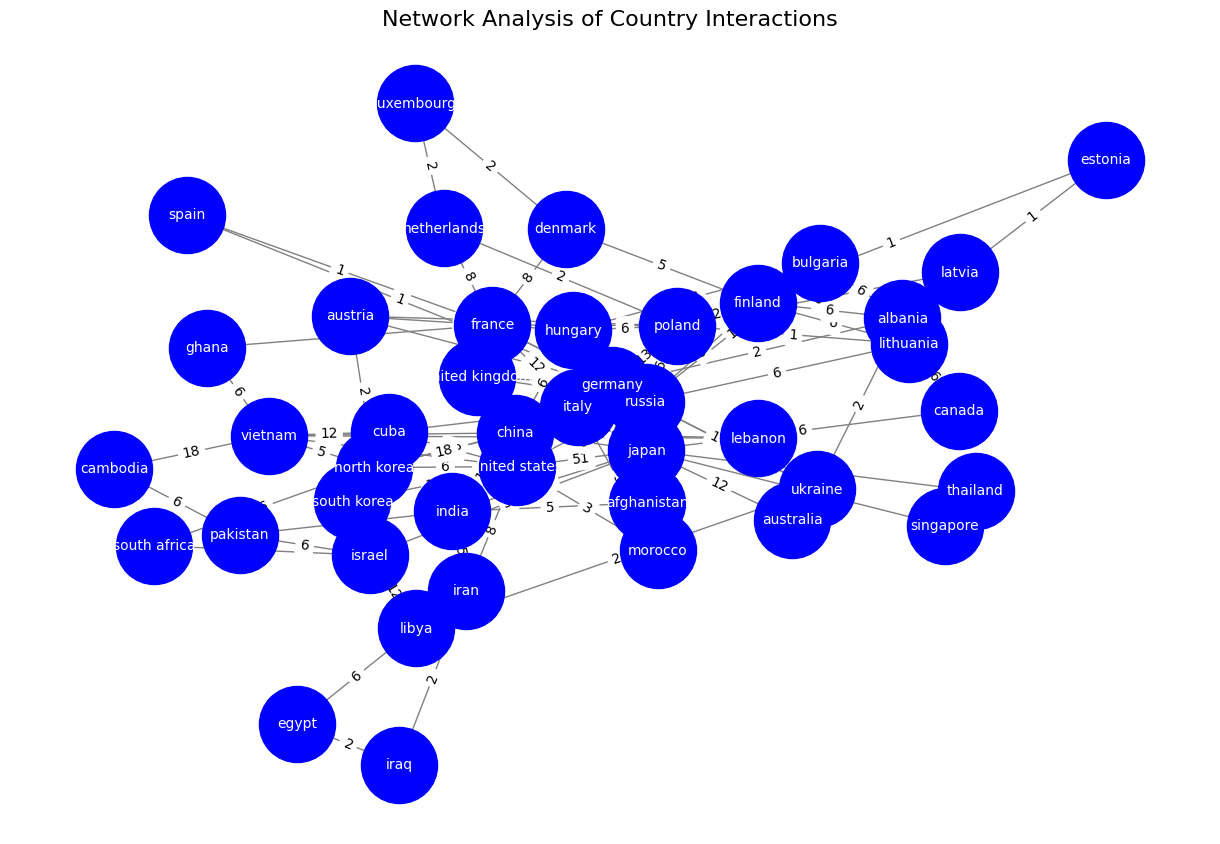

In [37]:
# Creating a network analysis

# Create a graph object
G = nx.Graph()

# Add edges with weights from the relationship_df
for _, row in relationship_df.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['value'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning nodes
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, font_color='white', node_color='blue', edge_color='gray')

# Add edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the graph
plt.title("Network Analysis of Country Interactions", fontsize=16)
plt.show()